Sampling rate is not in file, defaulting to 1.0 GHz


Event number: 2103009
Energy: 0.171976238489151 TeV
Alt: 1.2495054006576538 rad
Az: 3.1089043617248535 rad
LST_indices: [1004 1005 1006 1007]
1004


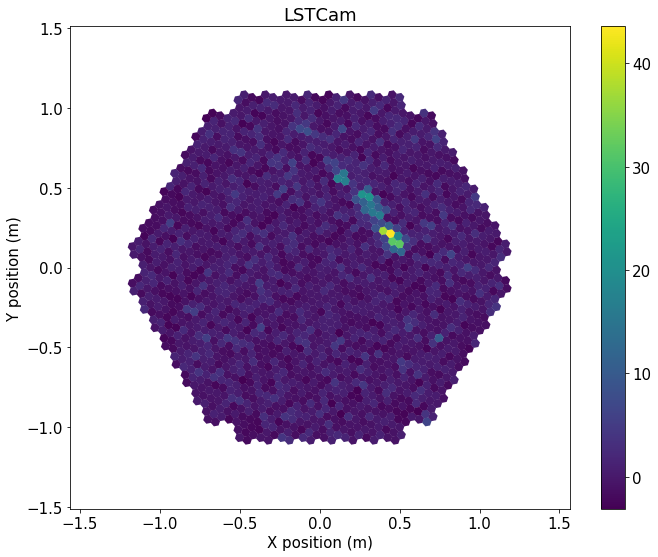

In [19]:
import tables
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.image import tailcuts_clean
from scipy.interpolate import griddata
from astropy import units as u

#data_path = '/Volumes/home/Development/AIs/CTA/simulations/Paranal_gamma_North_20deg_3HB9_DL1_ML1/gamma_20deg_0deg_srun800-4169___cta-prod3_desert-2150m-Paranal-HB9.h5'

data_path = '/home/pietro/ctasoft/CTA/data/orig/gamma-diffuse_20deg_180deg_runs811-1000___cta-prod3-demo-2147m-LaPalma-baseline-mono.h5'

data = tables.open_file(data_path)

# acquire the data
#data_einfo = data.root.Event_Info  		#vecchio format
#data_LST = data.root.LST           		#vecchio format
data_einfo = data.root.Events       		#nuovo format
data_LST = data.root.LST_LSTCam     		#nuovo format


# event info data !!!!!!!!!!!! QUI BISOGNA CAMBIARE LE STRINGHE CON QUELLE CHE HANNO MESSO NEI FILES NUOVI

# LST data
LST_event_index = [x['event_index'] for x in data_LST.iterrows()]		#OK
LST_image_charge = [x['charge'] for x in data_LST.iterrows()]		#OK 'image_charge' -> 'charge' 
#LST_image_peak_times = [x['image_peak_times'] for x in data_LST.iterrows()] #NEXT
LST_image_peak_times = [x['peakpos'] for x in data_LST.iterrows()]	#OK? 'peak_times' -> 'peakpos'

#user_choose = input("Inserisci il numero dell'evento: ")
user_choose = 500
e_idx = int(user_choose) #choose the number of the event
# select a spcific event
my_event = data_einfo[e_idx]
print('Event number: {}'.format(my_event['event_id']))
print('Energy: {} TeV'.format(my_event['mc_energy']))
print('Alt: {} rad'.format(my_event['alt']))
print('Az: {} rad'.format(my_event['az']))
my_indices = my_event['LST_LSTCam_indices']
print('LST_indices: ' + str(my_indices))

img_charge = LST_image_charge[my_indices[0]]
#img_charge = LST_image_charge[250]
print(my_indices[0])
img_time = LST_image_peak_times[my_indices[0]]
#print(img_charge)
#print(img_time)

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams.update({'axes.labelsize': 15})

camera = CameraGeometry.from_name('LSTCam')
fig = plt.figure(figsize=(10, 8))
display = CameraDisplay(camera)
display.image = img_charge
#display.image = img_time
display.add_colorbar()

fig.tight_layout()
#fig.savefig('IMG/charge/gamma_charge{}.eps'.format(e_idx), format='eps', bbox_inches='tight', transparent=False)
plt.show()
#display2 = CameraDisplay(camera)
#display2.image = img_time
#fig.savefig('IMG/time/gamma_time{}.eps'.format(e_idx), format='eps', bbox_inches='tight', transparent=False)

In [2]:
display

In [3]:
print(my_indices)

[ 0 34 35  0]


Sampling rate is not in file, defaulting to 1.0 GHz


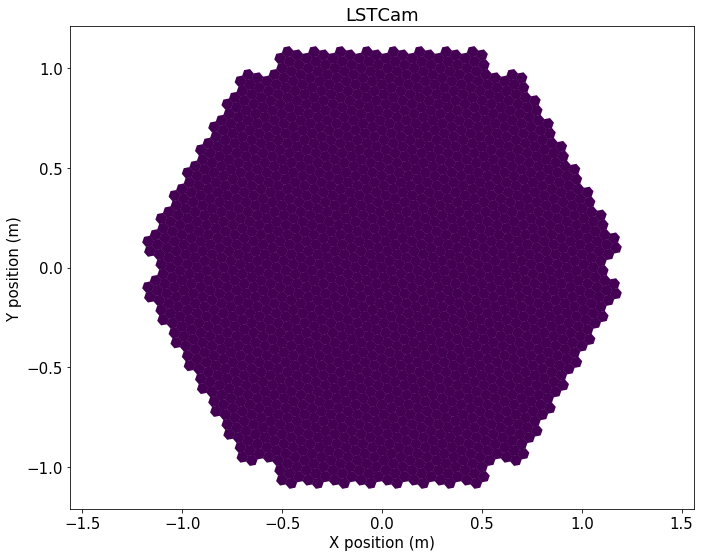

In [4]:
camera = CameraGeometry.from_name('LSTCam')
fig = plt.figure(figsize=(10, 8))
display1 = CameraDisplay(camera)
#display.image = img_charge
display1.image = img_time
#display.add_colorbar()b

fig.tight_layout()

In [5]:
type(img_charge)

numpy.ndarray

In [6]:
print(img_charge)

[0. 0. 0. ... 0. 0. 0.]


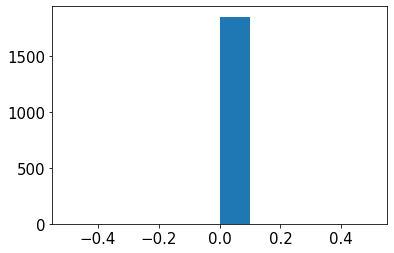

In [7]:
hist_charge = plt.hist(img_charge)

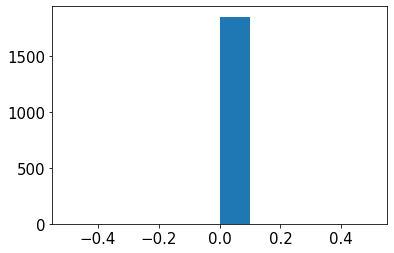

In [8]:
hist_time = plt.hist(img_time)

In [9]:
print(camera)

LSTCam


In [10]:
help(camera)

Help on CameraGeometry in module ctapipe.instrument.camera object:

class CameraGeometry(builtins.object)
 |  `CameraGeometry` is a class that stores information about a
 |  Cherenkov Camera that us useful for imaging algorithms and
 |  displays. It contains lists of pixel positions, areas, pixel
 |  shapes, as well as a neighbor (adjacency) list and matrix for each pixel.
 |  In general the neighbor_matrix attribute should be used in any algorithm
 |  needing pixel neighbors, since it is much faster. See for example
 |  `ctapipe.image.tailcuts_clean`
 |  
 |  The class is intended to be generic, and work with any Cherenkov
 |  Camera geometry, including those that have square vs hexagonal
 |  pixels, gaps between pixels, etc.
 |  
 |  You can construct a CameraGeometry either by specifying all data,
 |  or using the `CameraGeometry.guess()` constructor, which takes metadata
 |  like the pixel positions and telescope focal length to look up the rest
 |  of the data. Note that this func

In [11]:
pixx = camera.pix_x

In [12]:
np.set_printoptions(threshold=np.inf)

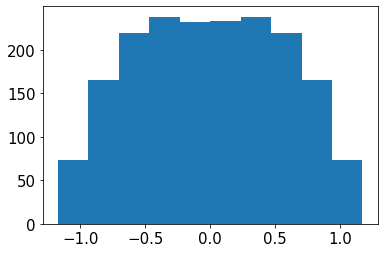

In [13]:
hist2=plt.hist(pixx.value)#, rwidth=0.1)

In [14]:
pixy = camera.pix_y

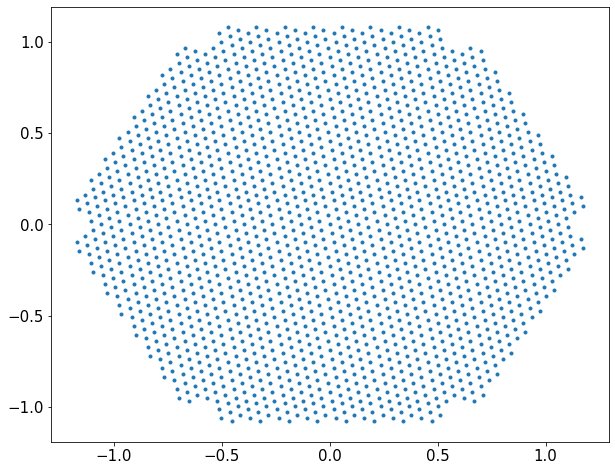

In [15]:
fig = plt.figure(figsize=(10, 8))
fig.tight_layout()
plt.scatter(pixx,pixy,marker=".")